<a href="https://colab.research.google.com/github/Unknown15082/Machine-Learning/blob/main/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from tqdm import tqdm
from torchvision import transforms

In [21]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [22]:
train_x = np.swapaxes(np.swapaxes(train_x, 2, 3), 1, 2)
test_x = np.swapaxes(np.swapaxes(test_x, 2, 3), 1, 2)

train_x = train_x / 255.0
test_x = test_x / 255.0

In [23]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.01, random_state = 123)

In [24]:
class Data(torch.utils.data.Dataset):
    def __init__(self, data, label):
        self.x = data
        self.y = label

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [25]:
train, val = Data(train_x, train_y), Data(val_x, val_y)
train_dataloader = torch.utils.data.DataLoader(train, batch_size = 32)
val_dataloader = torch.utils.data.DataLoader(val, batch_size = 32)

In [26]:
class ModelCNN(nn.Module):
    def __init__(self):
        super(ModelCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = "same")

        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.avgpool = nn.AvgPool2d(kernel_size = 2, stride = 2)

        self.relu = nn.ReLU()

        self.linear1 = nn.Linear(7 * 7 * 64, 32)
        self.linear2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.maxpool(self.conv1(x))
        x = self.avgpool(self.conv2(x))
        x = torch.flatten(x, 1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)

        return x

In [27]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [28]:
model = ModelCNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters())

min_val_loss = float("inf")

In [19]:
for epoch in range(20):
    total_loss_train = 0
    total_accuracy_train = 0

    total_loss_val = 0
    total_accuracy_val = 0

    for x, y in tqdm(train_dataloader):
        x = x.to(device)
        y = y.to(device)

        y = y.squeeze()

        output = model(x.float())
        
        batch_loss = criterion(output, y)
        total_loss_train += batch_loss

        acc = (output.argmax(dim = 1) == y).sum().item()
        total_accuracy_train += acc

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

    with torch.no_grad():
        for x, y in tqdm(val_dataloader):
            x = x.to(device)
            y = y.to(device)

            y = y.squeeze()

            output = model(x.float())

            batch_loss = criterion(output, y)
            total_loss_val += batch_loss

            acc = (output.argmax(dim = 1) == y).sum().item()
            total_accuracy_val += acc

    print(
        f"Epoch {epoch + 1} | Train Loss {total_loss_train / len(train) :.3f}\
		 | Train Accuracy {total_accuracy_train / len(train) :.3f}\
		 | Val Loss: {total_loss_val / len(val) :.3f}\
		 | Val Accuracy: {total_accuracy_val / len(val) :.3f}"
    )

    if min_val_loss > total_loss_val / len(val):
        min_val_loss = total_loss_val / len(val)
        torch.save(model.state_dict(), "cnnmodel.pt")
        print("Saved")

100%|██████████| 16/16 [00:00<00:00, 442.33it/s]


Epoch 1 | Train Loss 0.049		 | Train Accuracy 0.439		 | Val Loss: 0.046		 | Val Accuracy: 0.516
Saved


100%|██████████| 16/16 [00:00<00:00, 567.50it/s]


Epoch 2 | Train Loss 0.040		 | Train Accuracy 0.549		 | Val Loss: 0.043		 | Val Accuracy: 0.548
Saved


100%|██████████| 16/16 [00:00<00:00, 624.07it/s]


Epoch 3 | Train Loss 0.037		 | Train Accuracy 0.591		 | Val Loss: 0.041		 | Val Accuracy: 0.550
Saved


100%|██████████| 16/16 [00:00<00:00, 550.75it/s]


Epoch 4 | Train Loss 0.034		 | Train Accuracy 0.616		 | Val Loss: 0.040		 | Val Accuracy: 0.574
Saved


100%|██████████| 16/16 [00:00<00:00, 600.16it/s]


Epoch 5 | Train Loss 0.033		 | Train Accuracy 0.634		 | Val Loss: 0.038		 | Val Accuracy: 0.594
Saved


100%|██████████| 16/16 [00:00<00:00, 572.59it/s]


Epoch 6 | Train Loss 0.032		 | Train Accuracy 0.650		 | Val Loss: 0.038		 | Val Accuracy: 0.602
Saved


100%|██████████| 16/16 [00:00<00:00, 658.90it/s]


Epoch 7 | Train Loss 0.031		 | Train Accuracy 0.664		 | Val Loss: 0.038		 | Val Accuracy: 0.602


100%|██████████| 16/16 [00:00<00:00, 527.14it/s]


Epoch 8 | Train Loss 0.030		 | Train Accuracy 0.673		 | Val Loss: 0.037		 | Val Accuracy: 0.620
Saved


100%|██████████| 16/16 [00:00<00:00, 548.28it/s]


Epoch 9 | Train Loss 0.029		 | Train Accuracy 0.682		 | Val Loss: 0.037		 | Val Accuracy: 0.620
Saved


100%|██████████| 16/16 [00:00<00:00, 556.82it/s]


Epoch 10 | Train Loss 0.028		 | Train Accuracy 0.689		 | Val Loss: 0.038		 | Val Accuracy: 0.600


100%|██████████| 16/16 [00:00<00:00, 660.03it/s]


Epoch 11 | Train Loss 0.027		 | Train Accuracy 0.696		 | Val Loss: 0.038		 | Val Accuracy: 0.590


100%|██████████| 16/16 [00:00<00:00, 661.18it/s]


Epoch 12 | Train Loss 0.027		 | Train Accuracy 0.699		 | Val Loss: 0.039		 | Val Accuracy: 0.596


100%|██████████| 16/16 [00:00<00:00, 589.20it/s]


Epoch 13 | Train Loss 0.026		 | Train Accuracy 0.707		 | Val Loss: 0.038		 | Val Accuracy: 0.612


100%|██████████| 16/16 [00:00<00:00, 597.80it/s]


Epoch 14 | Train Loss 0.026		 | Train Accuracy 0.711		 | Val Loss: 0.038		 | Val Accuracy: 0.612


100%|██████████| 16/16 [00:00<00:00, 564.37it/s]


Epoch 15 | Train Loss 0.026		 | Train Accuracy 0.714		 | Val Loss: 0.039		 | Val Accuracy: 0.604


100%|██████████| 16/16 [00:00<00:00, 501.99it/s]


Epoch 16 | Train Loss 0.025		 | Train Accuracy 0.722		 | Val Loss: 0.039		 | Val Accuracy: 0.614


100%|██████████| 16/16 [00:00<00:00, 565.99it/s]


Epoch 17 | Train Loss 0.025		 | Train Accuracy 0.724		 | Val Loss: 0.042		 | Val Accuracy: 0.596


100%|██████████| 16/16 [00:00<00:00, 616.70it/s]


Epoch 18 | Train Loss 0.024		 | Train Accuracy 0.728		 | Val Loss: 0.042		 | Val Accuracy: 0.610


100%|██████████| 16/16 [00:00<00:00, 547.07it/s]


Epoch 19 | Train Loss 0.024		 | Train Accuracy 0.735		 | Val Loss: 0.042		 | Val Accuracy: 0.604


100%|██████████| 16/16 [00:00<00:00, 652.40it/s]

Epoch 20 | Train Loss 0.023		 | Train Accuracy 0.738		 | Val Loss: 0.043		 | Val Accuracy: 0.584


In [29]:
model = ModelCNN().to(device)
model.load_state_dict(torch.load("cnnmodel.pt"))

<All keys matched successfully>

In [30]:
test_x = torch.tensor(test_x).to(device)
test_y = torch.tensor(test_y).to(device)

In [31]:
labels = []

for i in range(25):
    labels.append(model(test_x[i : i+1].float()).argmax(dim = 1)[0].item())

In [32]:
train_x = np.swapaxes(np.swapaxes(train_x, 1, 2), 2, 3)
test_x = np.swapaxes(np.swapaxes(test_x, 1, 2), 2, 3)

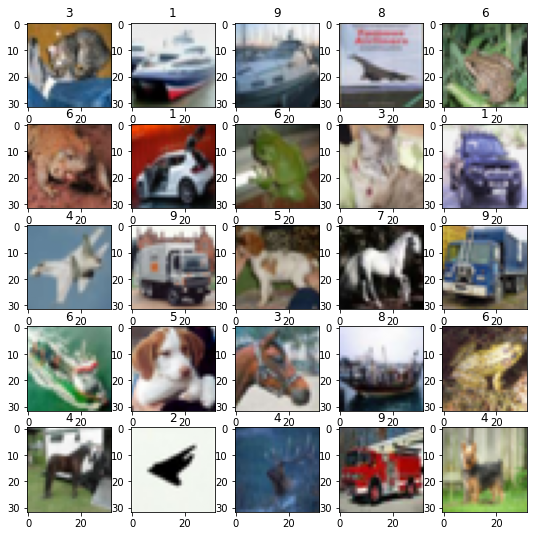

In [33]:
fig, axs = plt.subplots(5, 5, figsize = (9, 9))
for i in range(25):
    row = i // 5
    col = i % 5

    axs[row][col].imshow(test_x[i].cpu())
    axs[row][col].set_title(labels[i])

plt.show()